In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Segmentation evaluation metrics

In [2]:
from pyannote.core import Timeline, Segment

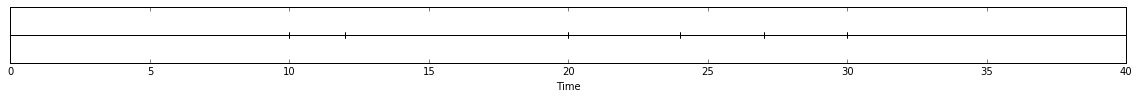

In [3]:
reference = Timeline()
reference.add(Segment(0, 10))
reference.add(Segment(10, 12))
reference.add(Segment(12, 20))
reference.add(Segment(20, 24))
reference.add(Segment(24, 27))
reference.add(Segment(27, 30))
reference.add(Segment(30, 40))
reference

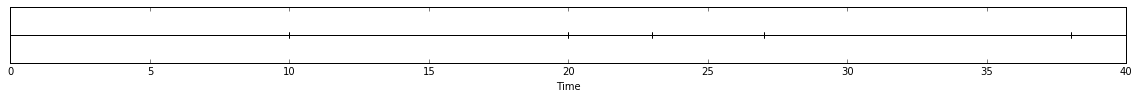

In [4]:
hypothesis = Timeline()
hypothesis.add(Segment(0, 10))
hypothesis.add(Segment(10, 20))
hypothesis.add(Segment(20, 23))
hypothesis.add(Segment(23, 27))
hypothesis.add(Segment(27, 38))
hypothesis.add(Segment(38, 40))
hypothesis

## Precision and recall

`SegmentationPrecision` and `SegmentationRecall` evaluate segmentation as a boundary detection task.

In [5]:
from pyannote.metrics.segmentation import SegmentationPrecision, SegmentationRecall
precision = SegmentationPrecision()
recall = SegmentationRecall()
print "Precision = {0:.3f}".format(precision(reference, hypothesis))
print "Recall = {0:.3f}".format(recall(reference, hypothesis))

Precision = 0.600
Recall = 0.500


### Details

In [6]:
precision(reference, hypothesis, detailed=True)

{u'number of boundaries': 5,
 u'number of matches': 3.0,
 u'segmentation precision': 0.6}

In [7]:
recall(reference, hypothesis, detailed=True)

{u'number of boundaries': 6,
 u'number of matches': 3.0,
 u'segmentation recall': 0.5}

### Tolerance

In [8]:
precision = SegmentationPrecision(tolerance=1.0)
precision(reference, hypothesis, detailed=True)

{u'number of boundaries': 5,
 u'number of matches': 4.0,
 u'segmentation precision': 0.8}

In [9]:
recall = SegmentationRecall(tolerance=1.0)
recall(reference, hypothesis, detailed=True)

{u'number of boundaries': 6,
 u'number of matches': 4.0,
 u'segmentation recall': 0.6666666666666666}

## Purity and coverage

`SegmentationPurity` and `SegmentationCoverage` provide information about under- or over-segmentation.
Low purity usually indicates under-segmentation, while low coverage stands for over-segmentation.

In [10]:
from pyannote.metrics.segmentation import SegmentationPurity, SegmentationCoverage
purity = SegmentationPurity()
coverage = SegmentationCoverage()
print "Purity = {0:.3f}".format(purity(reference, hypothesis))
print "Coverage = {0:.3f}".format(coverage(reference, hypothesis))

Purity = 0.850
Coverage = 0.925
